In [1]:
import pandas as pd
from os import listdir

FILE_PATH = "data/6ch"

# read data
tbl_factory = pd.read_csv(f"{FILE_PATH}/tbl_factory.csv")
tbl_warehouse = pd.read_csv(f"{FILE_PATH}/tbl_warehouse.csv")
tbl_transaction = pd.read_csv(f"{FILE_PATH}/tbl_transaction.csv")
rel_cost = pd.read_csv(f"{FILE_PATH}/rel_cost.csv")

In [2]:
# table for factory information
tbl_factory

,FCID,FCName,FCDemand,FCRegion
0,FC00001,서울공장,28,북부
1,FC00002,수원공장,29,북부
2,FC00003,인천공장,31,북부
3,FC00004,대전공장,25,북부
4,FC00005,대구공장,21,남부
5,FC00006,광주공장,30,남부
6,FC00007,부산공장,25,남부
7,FC00008,울산공장,16,남부


In [3]:
# table for warehouse information
tbl_warehouse

,WHID,WHName,WHSupply,WHRegion
0,WH00001,판교창고,35,북부
1,WH00002,용인창고,41,북부
2,WH00003,수원창고,42,북부
3,WH00004,대전창고,60,남부
4,WH00005,대구창고,72,남부
5,WH00006,광주창고,65,남부


In [4]:
# table for transaction between factory and warehouse
tbl_transaction

,TRID,TransactionDate,ToFC,FromWH,Quantity
0,0,2019-01-01 02:11:10,FC00004,WH00003,33
1,1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2,2019-01-01 06:32:32,FC00006,WH00004,31
3,3,2019-01-01 07:17:06,FC00002,WH00003,18
4,4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34


In [5]:
# relative delivery cost between factory and warehouse
rel_cost

,RCostID,FCID,WHID,Cost
0,1,FC00001,WH00001,0.4
1,2,FC00001,WH00002,0.8
2,3,FC00001,WH00003,1.5
3,4,FC00002,WH00001,0.9
4,5,FC00002,WH00002,0.8
5,6,FC00002,WH00003,1.6
6,7,FC00003,WH00001,1.2
7,8,FC00003,WH00002,1.3
8,9,FC00003,WH00003,1.5
9,10,FC00004,WH00001,0.8


# I. Preprocessing Data

### Purpose
#### 1. check the cost of delivery between factories and warehouses
#### 2. check the total number of merchandise delivered between factories and warehouses.

In [6]:
# Merge tranaction and cost data on factory id and warehouse id
join_data = pd.merge(tbl_transaction, rel_cost, left_on=["ToFC", "FromWH"], right_on=["FCID", "WHID"], how="left")
join_data

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8
...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29,21,FC00007,WH00006,1.3
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35,6,FC00002,WH00003,1.6
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36,7,FC00003,WH00001,1.2
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34,14,FC00005,WH00005,0.3


In [7]:
# Merge join_data and factory info
join_data = pd.merge(join_data, tbl_factory, on="FCID", how="left")
join_data

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,대전공장,25,북부
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,부산공장,25,남부
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,광주공장,30,남부
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,수원공장,29,북부
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,서울공장,28,북부
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29,21,FC00007,WH00006,1.3,부산공장,25,남부
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35,6,FC00002,WH00003,1.6,수원공장,29,북부
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36,7,FC00003,WH00001,1.2,인천공장,31,북부
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34,14,FC00005,WH00005,0.3,대구공장,21,남부


In [8]:
# Merge join_data and warehouse info
join_data = pd.merge(join_data, tbl_warehouse, on="WHID", how="left")
join_data

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion
0,0,2019-01-01 02:11:10,FC00004,WH00003,33,12,FC00004,WH00003,1.1,대전공장,25,북부,수원창고,42,북부
1,1,2019-01-01 06:12:42,FC00007,WH00006,19,21,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
2,2,2019-01-01 06:32:32,FC00006,WH00004,31,16,FC00006,WH00004,0.9,광주공장,30,남부,대전창고,60,남부
3,3,2019-01-01 07:17:06,FC00002,WH00003,18,6,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부
4,4,2019-01-01 07:52:18,FC00001,WH00002,30,2,FC00001,WH00002,0.8,서울공장,28,북부,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,FC00007,WH00006,29,21,FC00007,WH00006,1.3,부산공장,25,남부,광주창고,65,남부
3996,3996,2019-12-31 17:10:21,FC00002,WH00003,35,6,FC00002,WH00003,1.6,수원공장,29,북부,수원창고,42,북부
3997,3997,2019-12-31 19:35:07,FC00003,WH00001,36,7,FC00003,WH00001,1.2,인천공장,31,북부,판교창고,35,북부
3998,3998,2019-12-31 21:45:07,FC00005,WH00005,34,14,FC00005,WH00005,0.3,대구공장,21,남부,대구창고,72,남부


In [9]:
join_data[(join_data["WHRegion"] == "북부") & (join_data["FCRegion"] == "남부")]

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion


In [10]:
join_data[(join_data["WHRegion"] == "남부") & (join_data["FCRegion"] == "북부")]

,TRID,TransactionDate,ToFC,FromWH,Quantity,RCostID,FCID,WHID,Cost,FCName,FCDemand,FCRegion,WHName,WHSupply,WHRegion


### At glance...
- merchandise move from warehouse to factory which are located in a same region.
- split join_data into southern and northern data

In [11]:
join_data = join_data[["TRID", "TransactionDate", "Quantity", "RCostID", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data

,TRID,TransactionDate,Quantity,RCostID,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,0,2019-01-01 02:11:10,33,12,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,1,2019-01-01 06:12:42,19,21,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2,2019-01-01 06:32:32,31,16,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,3,2019-01-01 07:17:06,18,6,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,4,2019-01-01 07:52:18,30,2,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,2019-12-31 11:27:51,29,21,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
3996,3996,2019-12-31 17:10:21,35,6,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
3997,3997,2019-12-31 19:35:07,36,7,1.2,FC00003,인천공장,31,WH00001,판교창고,35,북부
3998,3998,2019-12-31 21:45:07,34,14,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부


In [12]:
join_data_north = join_data[join_data["WHRegion"] == "북부"]
join_data_south = join_data[join_data["WHRegion"] == "남부"]

In [13]:
join_data_north

,TRID,TransactionDate,Quantity,RCostID,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,0,2019-01-01 02:11:10,33,12,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,3,2019-01-01 07:17:06,18,6,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,4,2019-01-01 07:52:18,30,2,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,7,2019-01-01 09:09:30,12,3,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,8,2019-01-01 10:52:55,27,9,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부
...,...,...,...,...,...,...,...,...,...,...,...,...
3984,3984,2019-12-30 12:29:42,22,4,0.9,FC00002,수원공장,29,WH00001,판교창고,35,북부
3987,3987,2019-12-30 17:51:24,32,8,1.3,FC00003,인천공장,31,WH00002,용인창고,41,북부
3992,3992,2019-12-31 01:50:16,33,2,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
3996,3996,2019-12-31 17:10:21,35,6,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부


In [14]:
join_data_south

,TRID,TransactionDate,Quantity,RCostID,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,1,2019-01-01 06:12:42,19,21,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2,2019-01-01 06:32:32,31,16,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,5,2019-01-01 08:56:09,31,14,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,6,2019-01-01 09:00:15,33,18,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,9,2019-01-01 14:12:51,21,18,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
...,...,...,...,...,...,...,...,...,...,...,...,...
3993,3993,2019-12-31 03:35:04,20,18,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
3994,3994,2019-12-31 07:05:56,11,13,0.8,FC00005,대구공장,21,WH00004,대전창고,60,남부
3995,3995,2019-12-31 11:27:51,29,21,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
3998,3998,2019-12-31 21:45:07,34,14,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부


In [15]:
print(f"Total Delivery Cost in Southern area: {join_data_south['Cost'].sum()}")
print(f"The Total Number of Delivery in Southern area: {join_data_south['Quantity'].sum()}")
print(f"Average Delivery Cost in Southern area: {join_data_south['Cost'].sum() / join_data_south['Quantity'].sum()}")
print()
print(f"Total Delivery Cost in Northern: {join_data_north['Cost'].sum()}")
print(f"The Total Number of Delivery in Northern area: {join_data_north['Quantity'].sum()}")
print(f"Average Delivery Cost in Northern area: {join_data_north['Cost'].sum() / join_data_north['Quantity'].sum()}")

Total Delivery Cost in Southern area: 2062.0
The Total Number of Delivery in Southern area: 50214
Average Delivery Cost in Southern area: 0.04106424503126618

Total Delivery Cost in Northern: 2189.3
The Total Number of Delivery in Northern area: 49146
Average Delivery Cost in Northern area: 0.044546860375208566


### Analysis in Preprocessing
- Northern region delivers merchandise from warehouse to factory more efficient than Southern.
- But there is very small difference in Average Delivery Cost between Northern and Southern region.

### OK, What makes the difference?
- It is not possible to analyse the reason of difference with current data.
- There are some geological information about factories and warehouses, so they are required to find out the reason of efficiency in northern area.

#### Before Doing Analysis...
### Network Visualization

Anaconda contains so many useful tools for analysis and machine learning.
The package named 'networkx' is used for visualization of relationship between somethings.
Here is a simple example.

In [16]:
# import networkx for creating relationship in code.
import networkx as nx

# import matplotlib.pyplot for visualising
import matplotlib.pyplot as plt


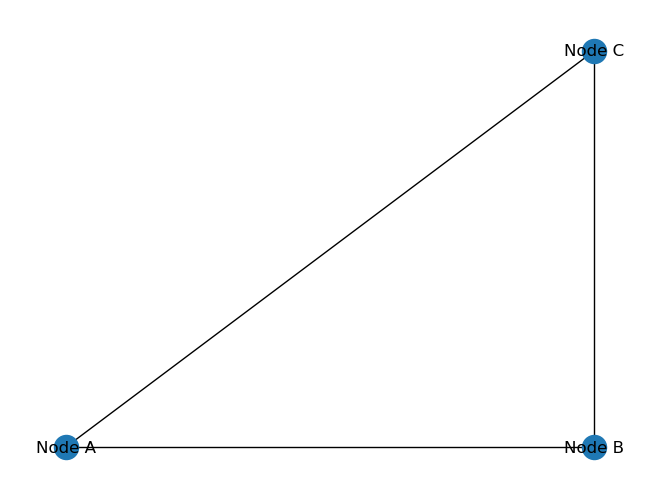

In [17]:
# create a graph
graph = nx.Graph()

# add nodes
graph.add_node("Node A")
graph.add_node("Node B")
graph.add_node("Node C")

# add edge(relation between node)
graph.add_edge("Node A", "Node B")
graph.add_edge("Node A", "Node C")
graph.add_edge("Node B", "Node C")

# set coordiation
pos = {}
pos.update({
    "Node A": (0, 0),
    "Node B": (2, 0),
    "Node C": (2, 1),
})

# draw graph with coordination via networkx
nx.draw(G=graph, pos=pos, with_labels=True)

# Express
# plt.show()


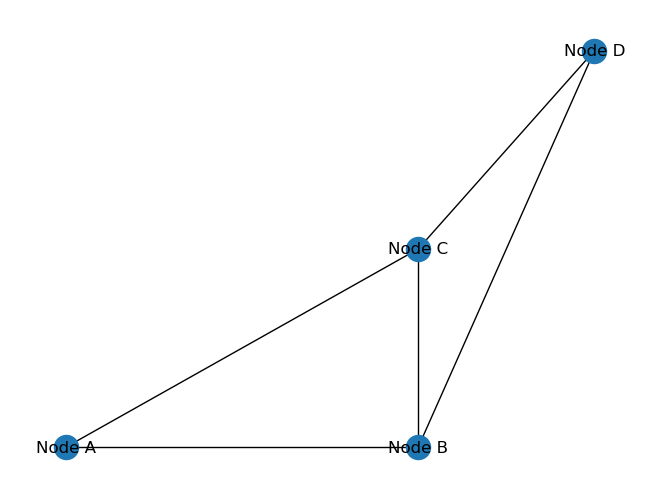

In [18]:
# Add additional node
graph.add_node("Node D")
graph.add_edge("Node D", "Node C")
graph.add_edge("Node D", "Node B")
pos.update({"Node D": (3, 2)})

# draw graph
nx.draw(G=graph, pos=pos, with_labels=True)

### OK, I can see the route between node, but How can I show the weight on each edge?

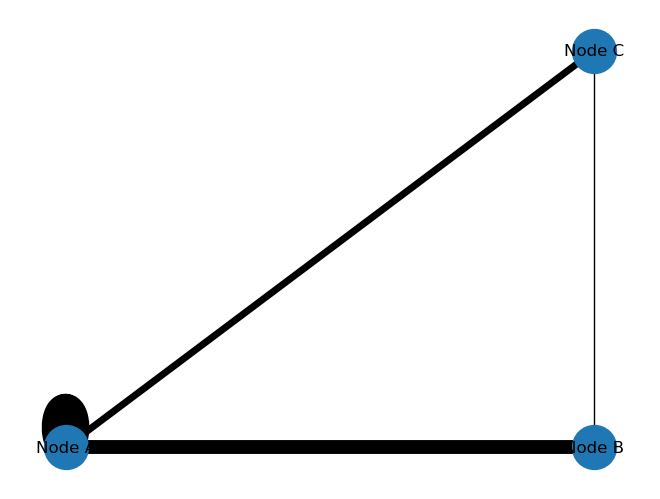

In [19]:
# create a graph
graph = nx.Graph()

# add nodes
graph.add_node("Node A")
graph.add_node("Node B")
graph.add_node("Node C")

# add edge(relation between node)
graph.add_edge("Node A", "Node A"),
graph.add_edge("Node A", "Node B")
graph.add_edge("Node A", "Node C")
graph.add_edge("Node B", "Node C")

# edge weight
# [(a, b), (a, c), (b, c),
weight = [20, 10, 5, 1]

# set coordiation
pos = {}
pos.update({
    "Node A": (0, 0),
    "Node B": (2, 0),
    "Node C": (2, 1),
})

# draw graph with coordination via networkx
nx.draw(G=graph, pos=pos, node_size=1000,with_labels=True, width=weight)

# Express
# plt.show()

In [20]:
# practice with network_weight.csv and network_pos.csv

node_pos = pd.read_csv(f"{FILE_PATH}/network_pos.csv")
edge_weight = pd.read_csv(f"{FILE_PATH}/network_weight.csv")

In [21]:
node_pos

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


- There are 5 nodes in pos data with x(0) and y(1) coordination


In [22]:
edge_weight

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [23]:
# create list of edge_weight
size = 10
edge_weights = []
for i in range(len(edge_weight)):
    for j in range(len(edge_weight.columns)):
        edge_weights.append(edge_weight.iloc[i][j] * size)

/tmp/ipykernel_7053/115687641.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  edge_weights.append(edge_weight.iloc[i][j] * size)


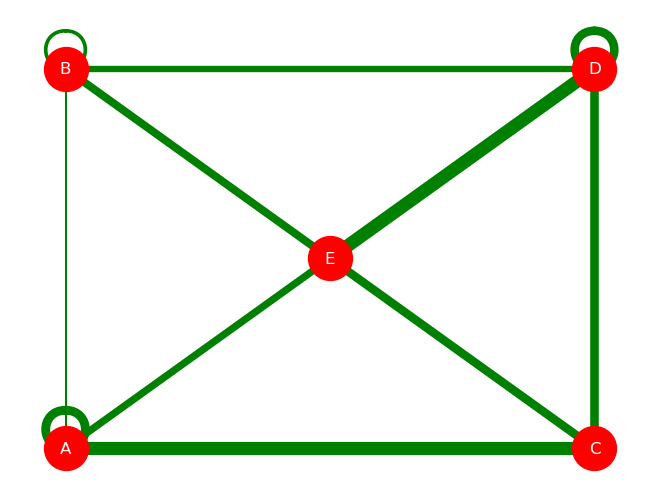

[('A', 'A'), ('A', 'B'), ('A', 'C'), ('A', 'D'), ('A', 'E'), ('B', 'B'), ('B', 'C'), ('B', 'D'), ('B', 'E'), ('C', 'C'), ('C', 'D'), ('C', 'E'), ('D', 'D'), ('D', 'E'), ('E', 'E')]
[6.39921, 1.4335300000000002, 9.44669, 5.21848, 0.0, 2.64556, 0.0, 4.5615, 5.68434, 0.0, 6.17635, 6.12096, 6.16934, 9.43748, 0.0, 0.0, 0.0, 6.97631, 0.60225, 6.66767, 6.706379999999999, 2.10383, 0.0, 3.15428, 0.0]
['A', 'B', 'C', 'D', 'E']


In [24]:
# draw graph with listerised weight
# create a graph
graph = nx.Graph()

# set node
for node in node_pos.columns:
    graph.add_node(node)

# create edge for all nodes: all nodes are connected
for n1 in node_pos.columns:
    for n2 in node_pos.columns:
        graph.add_edge(n1, n2)

# coordination
pos = {}
for node in node_pos.columns:
    x = node_pos[node][0]
    y = node_pos[node][1]
    pos.update({node: (x, y)})

# draw
nx.draw(G=graph,
        pos=pos, 
        width=edge_weights, 
        with_labels=True, 
        node_size=1000,     # size of node circle
        node_color='red',
        font_color="white",
        edge_color="green")
plt.show()

# show weight on edge
print(graph.edges)
print(edge_weights)
print(graph.nodes)

### End Basic Usage of Network Visualization

### Analysis Route Information with Network Visualization

In [25]:
# import route information

trans_route = pd.read_csv(f"{FILE_PATH}/trans_route.csv")
trans_route

,공장,F1,F2,F3,F4
0,W1,15,15,0,5
1,W2,5,0,30,5
2,W3,10,15,2,15


In [26]:
trans_route.set_index("공장", inplace=True)

In [27]:
# same as trans_route = pd.read_csv(f"{FILE_PATH}/trans_route.csv", index_col="공장")
trans_route

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [28]:
# visualization between warehous an factory
graph = nx.Graph()

# add factory node
for factory in trans_route.columns:
    graph.add_node(factory)

# add warehouse node
for warehouse in trans_route.index:
    graph.add_node(warehouse)

print(graph.nodes)

['F1', 'F2', 'F3', 'F4', 'W1', 'W2', 'W3']


In [29]:
# add edge
for wh in trans_route.index:
    for fc in trans_route.columns:
        graph.add_edge(wh, fc)

print(graph.edges)

[('F1', 'W1'), ('F1', 'W2'), ('F1', 'W3'), ('F2', 'W1'), ('F2', 'W2'), ('F2', 'W3'), ('F3', 'W1'), ('F3', 'W2'), ('F3', 'W3'), ('F4', 'W1'), ('F4', 'W2'), ('F4', 'W3')]


In [30]:
# listerisaion weight
size = 10
edge_weight = []
for data in graph.edges:
    edge_weight.append(trans_route[data[0]][data[1]] / 10)

print(edge_weight)

[1.5, 0.5, 1.0, 1.5, 0.0, 1.5, 0.0, 3.0, 0.2, 0.5, 0.5, 1.5]


In [31]:
# get node coordination
trans_route_pos = pd.read_csv(f"{FILE_PATH}/trans_route_pos.csv")
pos = {}
for node in trans_route_pos.columns:
    x = trans_route_pos[node][0]
    y = trans_route_pos[node][1]
    pos.update({node: (x, y)})

print(pos)

{'W1': (0, 1), 'W2': (0, 2), 'W3': (0, 3), 'F1': (4.0, 0.5), 'F2': (4.0, 1.5), 'F3': (4.0, 2.5), 'F4': (4.0, 3.5)}


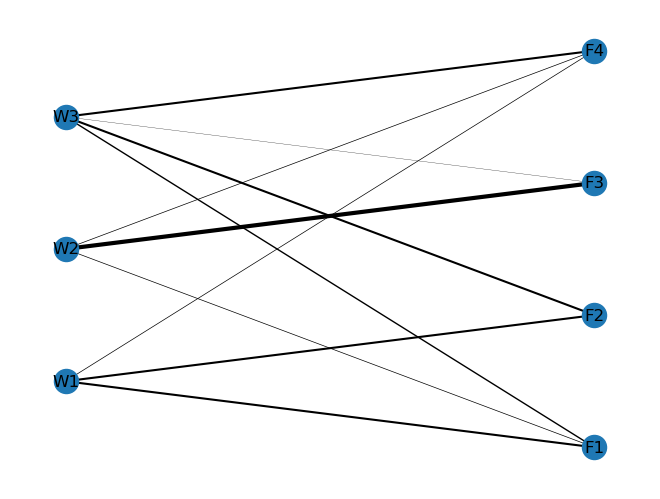

In [32]:
# draw graph

nx.draw(G=graph,
       pos=pos,
       width=edge_weight,
       with_labels=True)


In [56]:
# read route_cost.csv
trans_cost = pd.read_csv(f"{FILE_PATH}/trans_cost.csv", index_col="공장")
trans_cost

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [58]:
# total delivery cost between all warehouse and factory.
# function to calculate total delivery cost.
def total_cost(tr:pd.DataFrame, tc:pd.DataFrame) -> float:
    cost = 0
    for fc in tr.columns:
        for wh in tr.index:
            cost += tr.loc[wh][fc] * tc.loc[wh][fc]

    return cost

cost = total_cost(tr=trans_route, tc=trans_cost)
print(f"Total Cost: {cost}")

Total Cost: 1493


## Optimization to function total_cost
- each factory has a minumum demand of supply.
- each warehous has the maxinum number of supply.


In [59]:
factory_demand = pd.read_csv(f"{FILE_PATH}/demand.csv")
warehouse_supply = pd.read_csv(f"{FILE_PATH}/supply.csv")

In [60]:
factory_demand

,F1,F2,F3,F4
0,28,29,31,25


In [61]:
warehouse_supply

,W1,W2,W3
0,35,41,42


In [72]:
# add demand condition
for fc in factory_demand:
    # the total number of merchandise from warehouse
    num_merc = trans_route[fc].sum()
    # factory minimal demand
    f_demand = factory_demand[fc][0]
    
    print(f"The Total Number of Delivery to '{fc}': {num_merc}")
    print(f"The Limitation of Merchandise of '{fc}': {f_demand}")
    if num_merc >= f_demand:
        print(f"Factory '{fc}' was satisfied in supply.")
    else:
        print(f"Factory '{fc}' was not satisfied in supply.")
    print()

The Total Number of Delivery to 'F1': 30
The Limitation of Merchandise of 'F1': 28
Factory 'F1' was satisfied in supply.

The Total Number of Delivery to 'F2': 30
The Limitation of Merchandise of 'F2': 29
Factory 'F2' was satisfied in supply.

The Total Number of Delivery to 'F3': 32
The Limitation of Merchandise of 'F3': 31
Factory 'F3' was satisfied in supply.

The Total Number of Delivery to 'F4': 25
The Limitation of Merchandise of 'F4': 25
Factory 'F4' was satisfied in supply.



In [82]:
# add supply condition
for wh in trans_route.index:
    num_supply = trans_route.loc[wh].sum()
    wh_supply = warehouse_supply[wh][0]
    print(f"The Total Number of Supply from '{wh}': {num_supply}")
    print(f"The Possible Number of Supply from '{wh}': {wh_supply}")
    if num_supply > wh_supply:
        print(f"'{wh}' delivers merchandise EXCESSING its possible limitation")
    else:
        print(f"'{wh}' delivers merchandise in its possible limitation")
    print()

The Total Number of Supply from 'W1': 35
The Possible Number of Supply from 'W1': 35
'W1' delivers merchandise in its possible limitation

The Total Number of Supply from 'W2': 40
The Possible Number of Supply from 'W2': 41
'W2' delivers merchandise in its possible limitation

The Total Number of Supply from 'W3': 42
The Possible Number of Supply from 'W3': 42
'W3' delivers merchandise in its possible limitation



## Check Changes in Condition Function by Editing 'trans_route'

In [84]:
# read information about edited route

trans_route_new = pd.read_csv(f"{FILE_PATH}/trans_route_new.csv", index_col="공장")
trans_route_new

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [85]:
# Total Delivery Cost for New Route
cost = total_cost(tr=trans_route_new, tc=trans_cost)
print(f"Total Cost: {cost}")

Total Cost: 1428


#### Previous: 1493, After Edit: 1428

In [91]:
import numpy as np

# demand condition function
def condition_demand(tr:pd.DataFrame, fd:pd.DataFrame):
    flag = np.zeros(len(tr.columns))
    count = 0
    for fc in tr.columns:
        num_merc = tr[fc].sum()
        fc_demand = fd[fc][0]
        flag[count] = 1 if num_merc >= fc_demand else 0
        count += 1

    return flag

# supply condiion function
def condition_supply(tr:pd.DataFrame, ws:pd.DataFrame):
    flag = np.zeros(len(tr.index))
    count = 0
    for wh in tr.index:
        num_supply = tr.loc[wh].sum()
        wh_supply = ws[wh][0]
        flag[count] = 1 if num_supply <= wh_supply else 0
        count += 1

    return flag

demand_flag = condition_demand(tr=trans_route_new, fd=factory_demand)
supply_flag = condition_supply(tr=trans_route_new, ws=warehouse_supply)

In [92]:
print(demand_flag)
print(supply_flag)

[1. 1. 1. 1.]
[1. 0. 1.]


#### Result

- after changing the route, total delivery cost was decreased
- but warehouses w1 is excessing supply limits, so need to find another way to fix it.